pandas version: 2.2.2
numpy version: 2.0.0
matplotlib version: 3.9.0
sklearn version: 1.5.0
Python version: 3.12.4

Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import shapiro
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

# Load the dataset
data_path = r"C:\Users\pingk\Downloads\fadhli nitip\fadhli nitip\csv\data_rt4_countrybased_raw_nodrop.csv"  
province_code_path = r"C:\Users\pingk\Downloads\fadhli nitip\provincial code.xlsx" 
data = pd.read_csv(data_path)
province_codes = pd.read_excel(province_code_path)


Data Evaluation

In [2]:
data.head()

,prov_char,country_code,country_char,wavenumber,4000.122,3999.64,3999.158,3998.676,3998.194,3997.712,...,653.75,653.268,652.786,652.304,651.822,651.34,650.858,650.376,649.893,16158804.55800001
0,BBX,1,ID,ID-BBX-068-2307-031_001,0.000788,0.000813,0.000840,0.000858,0.000862,0.000843,...,0.011951,0.013370,0.014849,0.016154,0.017089,0.017538,0.017469,0.016946,0.016094,NaN
1,BBX,1,ID,ID-BBX-068-2307-031_002,0.001095,0.001078,0.001086,0.001114,0.001151,0.001180,...,0.012086,0.011914,0.011799,0.011801,0.011938,0.012208,0.012600,0.013097,0.013664,NaN
2,BBX,1,ID,ID-BBX-068-2307-031_003,0.000099,0.000153,0.000288,0.000470,0.000658,0.000814,...,0.010487,0.011307,0.012372,0.013532,0.014614,0.015469,0.015986,0.016134,0.015954,NaN
3,BBX,1,ID,ID-BBX-068-2307-031_004,0.001685,0.001802,0.001903,0.001975,0.002017,0.002031,...,0.008177,0.008240,0.008484,0.008982,0.009749,0.010722,0.011752,0.012653,0.013254,NaN
4,BBX,1,ID,ID-BBX-068-2307-031_005,0.002118,0.002196,0.002266,0.002324,0.002369,0.002404,...,0.009831,0.010143,0.010621,0.011171,0.011728,0.012274,0.012824,0.013402,0.014003,NaN


In [3]:
data.describe(include='all')

,prov_char,country_code,country_char,wavenumber,4000.122,3999.64,3999.158,3998.676,3998.194,3997.712,...,653.75,653.268,652.786,652.304,651.822,651.34,650.858,650.376,649.893,16158804.55800001
count,447,447.000000,447,447,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,...,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,0.0
unique,25,NaN,3,447,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,SNI,NaN,TH,MY-SGR-096-2401-004_003,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,75,NaN,361,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.221477,NaN,NaN,0.001279,0.001277,0.001277,0.001279,0.001286,0.001295,...,0.013692,0.013742,0.013847,0.013990,0.014141,0.014272,0.014354,0.014376,0.014337,NaN
std,NaN,0.480736,NaN,NaN,0.003983,0.003994,0.004009,0.004027,0.004048,0.004069,...,0.007954,0.007918,0.007826,0.007695,0.007549,0.007409,0.007291,0.007197,0.007127,NaN
min,NaN,0.000000,NaN,NaN,-0.053471,-0.053662,-0.053772,-0.053781,-0.053690,-0.053514,...,-0.099484,-0.098245,-0.095699,-0.092164,-0.088132,-0.084153,-0.080762,-0.078322,-0.076966,NaN
25%,NaN,0.000000,NaN,NaN,0.000008,0.000003,-0.000031,-0.000043,-0.000054,-0.000095,...,0.011937,0.012015,0.012305,0.012495,0.012564,0.012654,0.012732,0.012631,0.012610,NaN
50%,NaN,0.000000,NaN,NaN,0.001300,0.001353,0.001358,0.001390,0.001402,0.001363,...,0.014184,0.014284,0.014285,0.014418,0.014661,0.014679,0.014842,0.014915,0.014868,NaN
75%,NaN,0.000000,NaN,NaN,0.002414,0.002380,0.002389,0.002382,0.002427,0.002439,...,0.016450,0.016250,0.016455,0.016583,0.016644,0.016838,0.016899,0.016996,0.017127,NaN


In [4]:
data.isnull().sum()

prov_char              0
country_code           0
country_char           0
wavenumber             0
4000.122               0
                    ... 
651.34                 0
650.858                0
650.376                0
649.893                0
16158804.55800001    447
Length: 6955, dtype: int64

In [5]:
data.isna().sum()

prov_char              0
country_code           0
country_char           0
wavenumber             0
4000.122               0
                    ... 
651.34                 0
650.858                0
650.376                0
649.893                0
16158804.55800001    447
Length: 6955, dtype: int64

In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
# Data Evaluation
print("Data Head:\n", data.head())

Data Head:
   prov_char  country_code country_char               wavenumber  4000.122  \
0       BBX             1           ID  ID-BBX-068-2307-031_001  0.000788   
1       BBX             1           ID  ID-BBX-068-2307-031_002  0.001095   
2       BBX             1           ID  ID-BBX-068-2307-031_003  0.000099   
3       BBX             1           ID  ID-BBX-068-2307-031_004  0.001685   
4       BBX             1           ID  ID-BBX-068-2307-031_005  0.002118   

    3999.64  3999.158  3998.676  3998.194  3997.712  ...    653.75   653.268  \
0  0.000813  0.000840  0.000858  0.000862  0.000843  ...  0.011951  0.013370   
1  0.001078  0.001086  0.001114  0.001151  0.001180  ...  0.012086  0.011914   
2  0.000153  0.000288  0.000470  0.000658  0.000814  ...  0.010487  0.011307   
3  0.001802  0.001903  0.001975  0.002017  0.002031  ...  0.008177  0.008240   
4  0.002196  0.002266  0.002324  0.002369  0.002404  ...  0.009831  0.010143   

    652.786   652.304   651.822    651.34   

In [8]:
print("\nData Describe:\n", data.describe(include='all'))


Data Describe:
        prov_char  country_code country_char               wavenumber  \
count        447    447.000000          447                      447   
unique        25           NaN            3                      447   
top          SNI           NaN           TH  MY-SGR-096-2401-004_003   
freq          75           NaN          361                        1   
mean         NaN      0.221477          NaN                      NaN   
std          NaN      0.480736          NaN                      NaN   
min          NaN      0.000000          NaN                      NaN   
25%          NaN      0.000000          NaN                      NaN   
50%          NaN      0.000000          NaN                      NaN   
75%          NaN      0.000000          NaN                      NaN   
max          NaN      2.000000          NaN                      NaN   

          4000.122     3999.64    3999.158    3998.676    3998.194  \
count   447.000000  447.000000  447.000000  447.

In [9]:
print("\nData IsNull:\n", data.isnull().sum())


Data IsNull:
 prov_char              0
country_code           0
country_char           0
wavenumber             0
4000.122               0
                    ... 
651.34                 0
650.858                0
650.376                0
649.893                0
16158804.55800001    447
Length: 6955, dtype: int64


In [10]:
print("\nData IsNA:\n", data.isna().sum())


Data IsNA:
 prov_char              0
country_code           0
country_char           0
wavenumber             0
4000.122               0
                    ... 
651.34                 0
650.858                0
650.376                0
649.893                0
16158804.55800001    447
Length: 6955, dtype: int64


In [11]:
print("\nDuplicates:\n", data.duplicated().sum())


Duplicates:
 0


Mapping for Country

In [12]:
# Create a mapping for country codes to country names
country_mapping = {
    0: 'Thailand',
    1: 'Indonesia',
    2: 'Malaysia'
}

# Map the country codes to country names
data['country_name'] = data['country_code'].map(country_mapping)

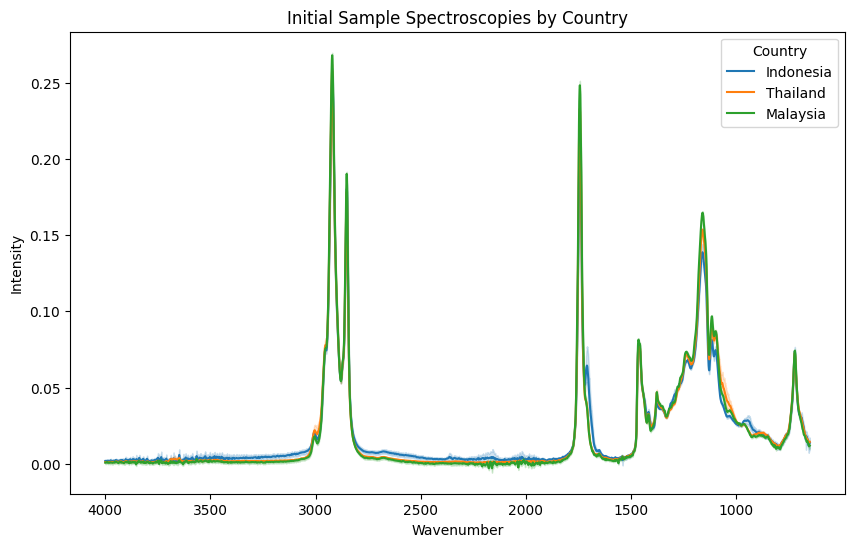

In [20]:
# Data Visualization (Spectroscopy Data by Country Code)
spectroscopy_columns = data.columns.difference(['country_code', 'prov_char', 'country_char', 'wavenumber'])
melted_data = data.melt(id_vars='country_name', value_vars=spectroscopy_columns, var_name='Wavenumber', value_name='Intensity')

# Convert Wavenumber to numeric if it's not already
melted_data['Wavenumber'] = pd.to_numeric(melted_data['Wavenumber'])

plt.figure(figsize=(10, 6))
sns.lineplot(data=melted_data, x='Wavenumber', y='Intensity', hue='country_name', palette='tab10')
plt.title('Initial Sample Spectroscopies by Country')
plt.xlabel('Wavenumber')
plt.ylabel('Intensity')
plt.legend(title='Country')

# Improve x-axis readability by setting ticks every 500 cm⁻¹ and reversing the axis
plt.xticks(np.arange(4000, 649, -500))  # Ticks from 4000 to 650 cm⁻¹
plt.gca().invert_xaxis()  # Reverse the x-axis

plt.show()

In [14]:
# Province counts on 'data'
print("\nProvince Counts:\n", data['prov_char'].value_counts())


Province Counts:
 prov_char
SNI    75
CPN    42
TRG    39
KBI    37
NRT    24
SNK    24
NWT    24
BBX    18
KBX    18
PKN    18
SUX    18
RNG    16
STN    15
CCO    13
CBI    12
RIX    11
SGR    11
PTN     7
KRI     6
KTX     5
SSX     3
PNA     3
PLG     3
SKM     3
JHR     2
Name: count, dtype: int64


In [15]:
# Country counts on 'data'
print("\nCountry Counts:\n", data['country_code'].value_counts())


Country Counts:
 country_code
0    361
1     73
2     13
Name: count, dtype: int64


Data Normality Test

In [16]:
# Data Normality Test using Shapiro-Wilk test
normality_results = data.iloc[:, 4:-1].apply(lambda x: shapiro(x)[1])
print("\nShapiro-Wilk Test Results (P-Values):\n", normality_results)



Shapiro-Wilk Test Results (P-Values):
 4000.122             2.982233e-29
3999.64              2.703845e-29
3999.158             2.572700e-29
3998.676             2.588272e-29
3998.194             2.757505e-29
                         ...     
651.34               9.866865e-36
650.858              2.386897e-35
650.376              4.838684e-35
649.893              7.040533e-35
16158804.55800001             NaN
Length: 6951, dtype: float64


The Shapiro-Wilk test is a statistical test used to assess the normality of a dataset. It evaluates whether a sample comes from a normally distributed population. The null hypothesis for this test is that the data is normally distributed.

Shapiro-Wilk Test
Null Hypothesis (H0): The data is normally distributed.
Alternative Hypothesis (H1): The data is not normally distributed.
Interpretation
p-value > 0.05: Fail to reject the null hypothesis (the data is likely normal).
p-value ≤ 0.05: Reject the null hypothesis (the data is likely not normal).
Impact on Data Processing
Performing the Shapiro-Wilk test helps in understanding the distribution of your data. If the data is normally distributed, certain statistical methods and transformations might be more appropriate. For non-normally distributed data, you might need to consider other methods or transformations to meet the assumptions of downstream analyses.

In the context of the given code, using the Shapiro-Wilk test will help you determine whether your FTIR data follows a normal distribution, which could influence how you preprocess and analyze the data.

Extract FTIR Spectrum Data

In [17]:
# Extract FTIR Spectrum Data
ftir_data = data.iloc[:, 4:-1]  # Exclude metadata columns and last column with NaN values
ftir_data = ftir_data.apply(pd.to_numeric, errors='coerce').fillna(0)  # Convert to numeric and handle NaNs

ftir_data.head()

,4000.122,3999.64,3999.158,3998.676,3998.194,3997.712,3997.23,3996.747,3996.265,3995.783,...,653.75,653.268,652.786,652.304,651.822,651.34,650.858,650.376,649.893,16158804.55800001
0,0.000788,0.000813,0.000840,0.000858,0.000862,0.000843,0.000797,0.000719,0.000609,0.000476,...,0.011951,0.013370,0.014849,0.016154,0.017089,0.017538,0.017469,0.016946,0.016094,0.0
1,0.001095,0.001078,0.001086,0.001114,0.001151,0.001180,0.001182,0.001144,0.001064,0.000951,...,0.012086,0.011914,0.011799,0.011801,0.011938,0.012208,0.012600,0.013097,0.013664,0.0
2,0.000099,0.000153,0.000288,0.000470,0.000658,0.000814,0.000909,0.000928,0.000871,0.000755,...,0.010487,0.011307,0.012372,0.013532,0.014614,0.015469,0.015986,0.016134,0.015954,0.0
3,0.001685,0.001802,0.001903,0.001975,0.002017,0.002031,0.002019,0.001983,0.001925,0.001851,...,0.008177,0.008240,0.008484,0.008982,0.009749,0.010722,0.011752,0.012653,0.013254,0.0
4,0.002118,0.002196,0.002266,0.002324,0.002369,0.002404,0.002435,0.002460,0.002472,0.002461,...,0.009831,0.010143,0.010621,0.011171,0.011728,0.012274,0.012824,0.013402,0.014003,0.0


PCA

In [ ]:
# Perform PCA (n=2)
pca_1 = PCA(n_components=2, random_state=42)
pca_transformed_data_1 = pca_1.fit_transform(ftir_data)

Plot PCA Results with Confidence Ellipses

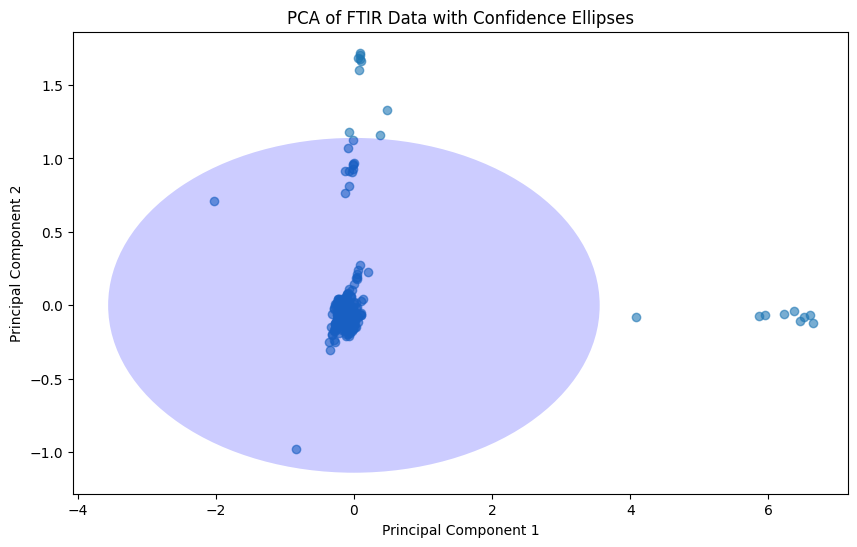

In [ ]:
def plot_confidence_ellipse(ax, data, color, n_std=2.0, **kwargs):
    cov = np.cov(data, rowvar=False)
    mean = np.mean(data, axis=0)
    pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
                      width=ell_radius_x * 2 * n_std,
                      height=ell_radius_y * 2 * n_std,
                      facecolor=color, edgecolor='none', alpha=0.2, **kwargs)
    scale_x = np.sqrt(cov[0, 0]) * n_std
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_x, mean_y = mean
    transf = (transforms.Affine2D()
              .rotate_deg(45)
              .scale(scale_x, scale_y)
              .translate(mean_x, mean_y))
    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_transformed_data_1[:, 0], pca_transformed_data_1[:, 1], alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of FTIR Data with Confidence Ellipses')

ax = plt.gca()
plot_confidence_ellipse(ax, pca_transformed_data_1, 'blue')

plt.show()


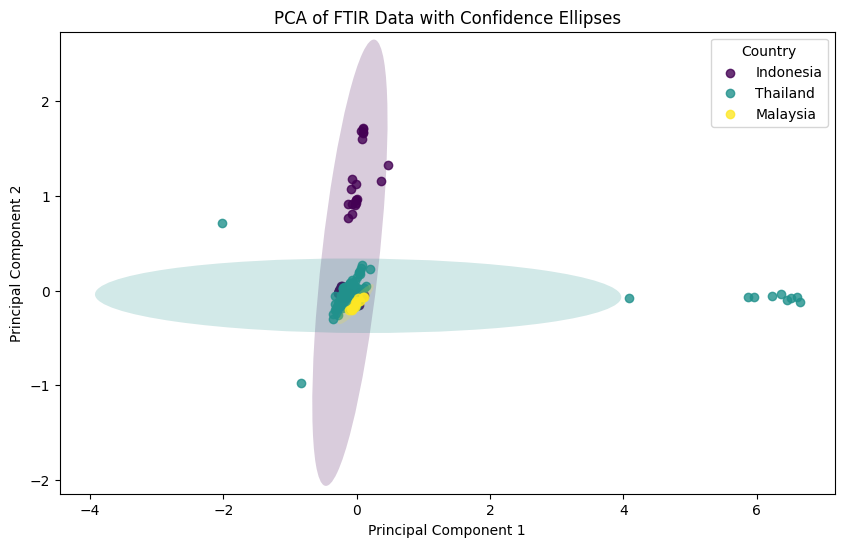

In [22]:
def plot_confidence_ellipse(ax, data, color, n_std=2.0, **kwargs):
    cov = np.cov(data, rowvar=False)
    mean = np.mean(data, axis=0)
    pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
                      width=ell_radius_x * 2 * n_std,
                      height=ell_radius_y * 2 * n_std,
                      facecolor=color, edgecolor='none', alpha=0.2, **kwargs)
    scale_x = np.sqrt(cov[0, 0]) * n_std
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_x, mean_y = mean
    transf = (transforms.Affine2D()
              .rotate_deg(45)
              .scale(scale_x, scale_y)
              .translate(mean_x, mean_y))
    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

# Color by country using viridis palette
unique_countries = data['country_name'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_countries)))

plt.figure(figsize=(10, 6))
for country, color in zip(unique_countries, colors):
    idx = data['country_name'] == country
    plt.scatter(pca_transformed_data_1[idx, 0], pca_transformed_data_1[idx, 1], label=country, alpha=0.8, color=color)
    plot_confidence_ellipse(plt.gca(), pca_transformed_data_1[idx], color=color)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of FTIR Data with Confidence Ellipses')
plt.legend(title='Country')
plt.show()

PCA Loadings

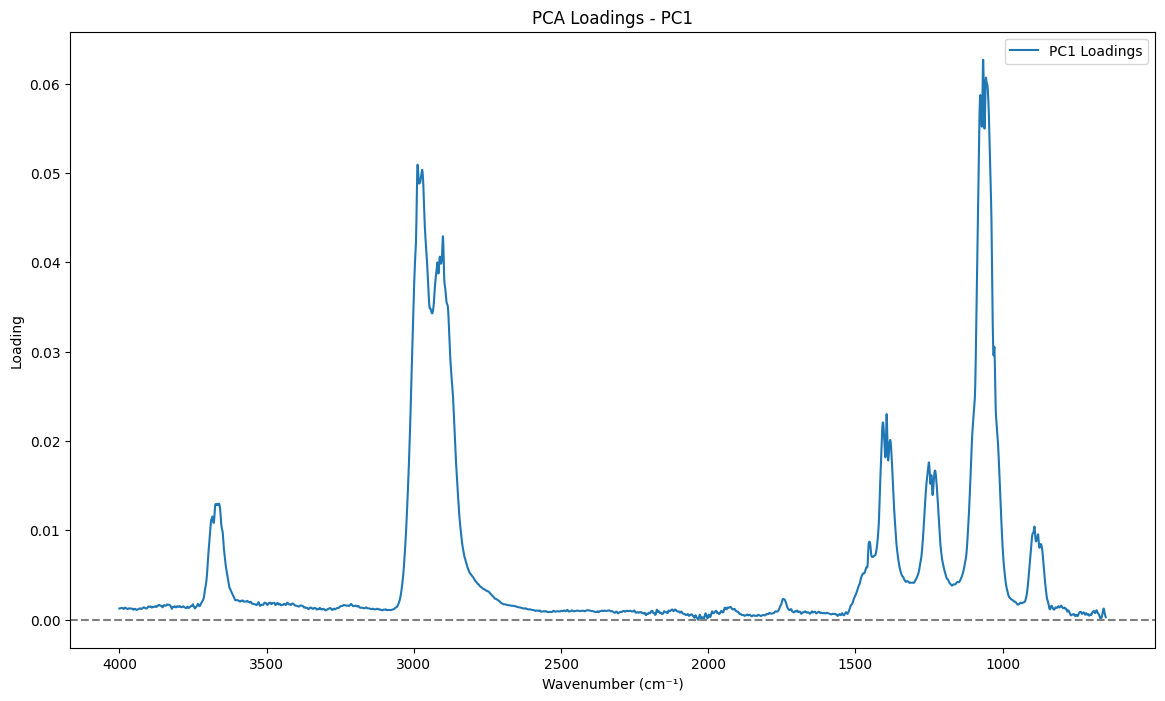

In [25]:
from scipy.ndimage import gaussian_filter1d


# Smooth the PCA loadings
def smooth_loadings(loadings, sigma=2):
    return gaussian_filter1d(loadings, sigma=sigma)

smoothed_pc1_loadings = smooth_loadings(pca_1.components_[0])
smoothed_pc2_loadings = smooth_loadings(pca_1.components_[1])

# Assuming the columns represent wavenumbers
wavenumbers = np.linspace(4000, 650, ftir_data.shape[1])  # Adjust to match the actual wavenumber range

# Plot PCA loadings for PC1
plt.figure(figsize=(14, 8))
plt.plot(wavenumbers, smoothed_pc1_loadings, label='PC1 Loadings')
plt.axhline(0, color='gray', linestyle='dashed')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Loading')
plt.title('PCA Loadings - PC1')
plt.legend()

# Improve x-axis readability by setting ticks every 500 cm⁻¹ and reversing the axis
plt.xticks(np.arange(4000, 649, -500))  # Ticks from 4000 to 650 cm⁻¹
plt.gca().invert_xaxis()  # Reverse the x-axis

plt.show()

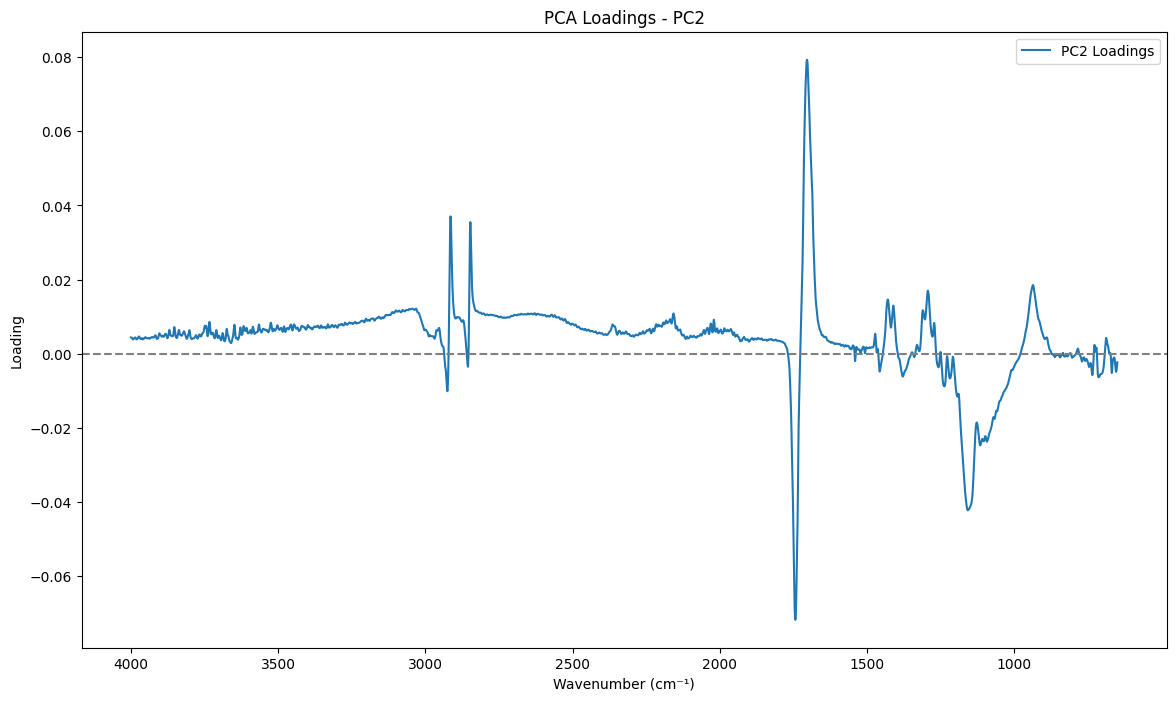

In [26]:
# Plot PCA loadings for PC2
plt.figure(figsize=(14, 8))
plt.plot(wavenumbers, smoothed_pc2_loadings, label='PC2 Loadings')
plt.axhline(0, color='gray', linestyle='dashed')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Loading')
plt.title('PCA Loadings - PC2')
plt.legend()

# Improve x-axis readability by setting ticks every 500 cm⁻¹ and reversing the axis
plt.xticks(np.arange(4000, 649, -500))  # Ticks from 4000 to 650 cm⁻¹
plt.gca().invert_xaxis()  # Reverse the x-axis

plt.show()

In [28]:

print("\nPCA Loadings Table:\n", loading_df)


PCA Loadings Table:
                         PC1       PC2
4000.122           0.001108  0.001255
3999.64            0.001099  0.001254
3999.158           0.001094  0.001250
3998.676           0.001094  0.001247
3998.194           0.001099  0.001244
...                     ...       ...
651.34             0.000447 -0.001176
650.858            0.000416 -0.001105
650.376            0.000387 -0.001051
649.893            0.000360 -0.001018
16158804.55800001  0.000000  0.000000

[6951 rows x 2 columns]


In [29]:
loading_df = pd.DataFrame({
    'Wavenumber': wavenumbers,
    'PC1': smoothed_pc1_loadings,
    'PC2': smoothed_pc2_loadings
})

# Select top 10 most influential wavenumbers for PC1 and PC2
top_n = 10
top_pc1 = loading_df.reindex(loading_df['PC1'].abs().sort_values(ascending=False).index).head(top_n)
top_pc2 = loading_df.reindex(loading_df['PC2'].abs().sort_values(ascending=False).index).head(top_n)

print("Top 10 Most Influential Wavenumbers for PC1:")
print(top_pc1[['Wavenumber', 'PC1']])

print("Top 10 Most Influential Wavenumbers for PC2:")
print(top_pc2[['Wavenumber', 'PC2']])

Top 10 Most Influential Wavenumbers for PC1:
       Wavenumber       PC1
6086  1066.460432  0.062696
6087  1065.978417  0.062661
6085  1066.942446  0.062177
6088  1065.496403  0.062093
6084  1067.424460  0.061201
6089  1065.014388  0.061112
6106  1056.820144  0.060689
6107  1056.338129  0.060617
6105  1057.302158  0.060602
6108  1055.856115  0.060460
Top 10 Most Influential Wavenumbers for PC2:
       Wavenumber       PC2
4763  1704.165468  0.079334
4764  1703.683453  0.079316
4762  1704.647482  0.079199
4765  1703.201439  0.079151
4761  1705.129496  0.078897
4766  1702.719424  0.078837
4760  1705.611511  0.078424
4767  1702.237410  0.078357
4759  1706.093525  0.077793
4768  1701.755396  0.077697


PCA (n=5)

In [31]:
pca_2 = PCA(n_components=5, random_state=42)
pca_transformed_data_2 = pca_2.fit_transform(ftir_data)

In [35]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

from mpl_toolkits.mplot3d import Axes3D

import plotly.express as px

fig = px.scatter_3d(
    x=pca_transformed_data_2[:, 0],
    y=pca_transformed_data_2[:, 1],
    z=pca_transformed_data_2[:, 2],
    title="3D PCA Plot",
    labels={"x": "PC1", "y": "PC2", "z": "PC3"}
)
fig.show()

In [38]:
loading_df_2 = pd.DataFrame(pca_2.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=ftir_data.columns)
print("\nPCA Loadings Table (n=5):\n", loading_df_2)


PCA Loadings Table (n=5):
                         PC1       PC2       PC3       PC4       PC5
4000.122           0.001246  0.004406  0.011122 -0.000672 -0.019557
3999.64            0.001235  0.004401  0.011227 -0.000747 -0.019521
3999.158           0.001229  0.004390  0.011390 -0.000841 -0.019403
3998.676           0.001230  0.004378  0.011597 -0.000946 -0.019212
3998.194           0.001236  0.004367  0.011825 -0.001053 -0.018975
...                     ...       ...       ...       ...       ...
651.34             0.000503 -0.004128 -0.022602  0.008447 -0.036309
650.858            0.000468 -0.003880 -0.022004  0.008049 -0.035786
650.376            0.000435 -0.003688 -0.021518  0.007737 -0.035350
649.893            0.000405 -0.003573 -0.021176  0.007520 -0.035002
16158804.55800001  0.000000  0.000000  0.000000 -0.000000 -0.000000

[6951 rows x 5 columns]


PCA with Standard Scaler

In [39]:
# Standardize the data before PCA
scaler = StandardScaler()
scaled_ftir_data = scaler.fit_transform(ftir_data)

In [40]:
# Perform PCA (n=2)
pca_2 = PCA(n_components=2, random_state=42)
pca_transformed_data_2 = pca_2.fit_transform(scaled_ftir_data)

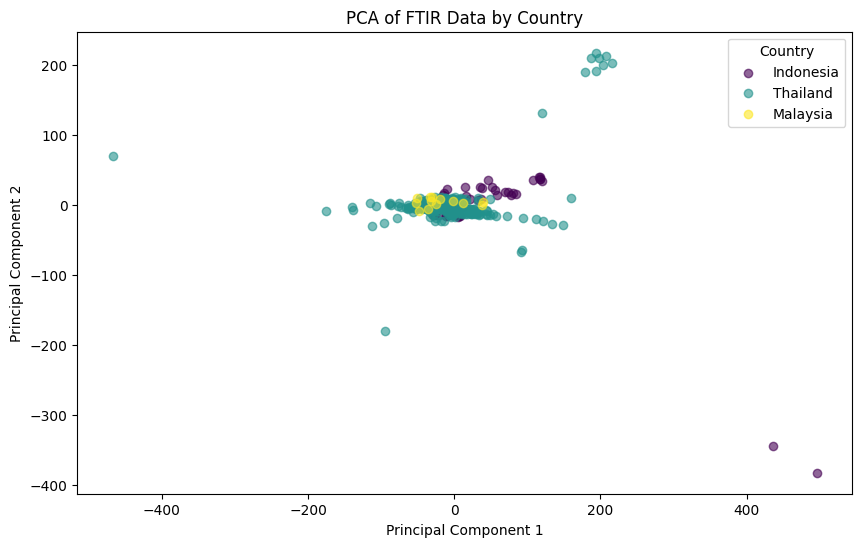

In [41]:
# Plot PCA Results colored by countries
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(data['country_name'].unique())))
for country, color in zip(data['country_name'].unique(), colors):
    idx = data['country_name'] == country
    plt.scatter(pca_transformed_data_2[idx, 0], pca_transformed_data_2[idx, 1], label=country, alpha=0.6, color=color)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of FTIR Data by Country')
plt.legend(title='Country')
plt.show()


In [42]:
# Plot PCA Loadings for PC1 and PC2
def plot_pca_loadings(loadings, title):
    wavenumbers = np.linspace(4000, 650, ftir_data.shape[1])  # Adjust to match the actual wavenumber range
    plt.figure(figsize=(14, 8))
    plt.plot(wavenumbers, loadings)
    plt.axhline(0, color='gray', linestyle='dashed')
    plt.xlabel('Wavenumber (cm⁻¹)')
    plt.ylabel('Loading')
    plt.title(title)
    plt.xticks(np.arange(4000, 649, -500))  # Ticks from 4000 to 650 cm⁻¹
    plt.gca().invert_xaxis()  # Reverse the x-axis
    plt.show()


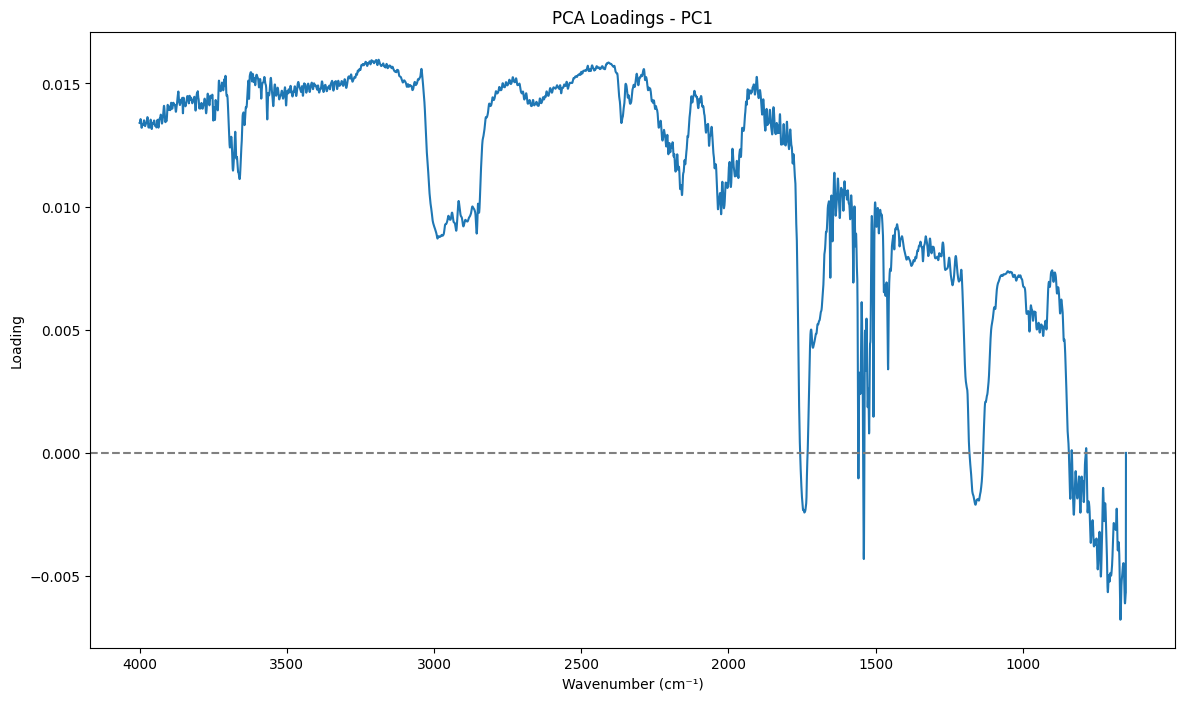

In [43]:
# Plot PCA loadings for PC1
plot_pca_loadings(pca_2.components_[0], 'PCA Loadings - PC1')

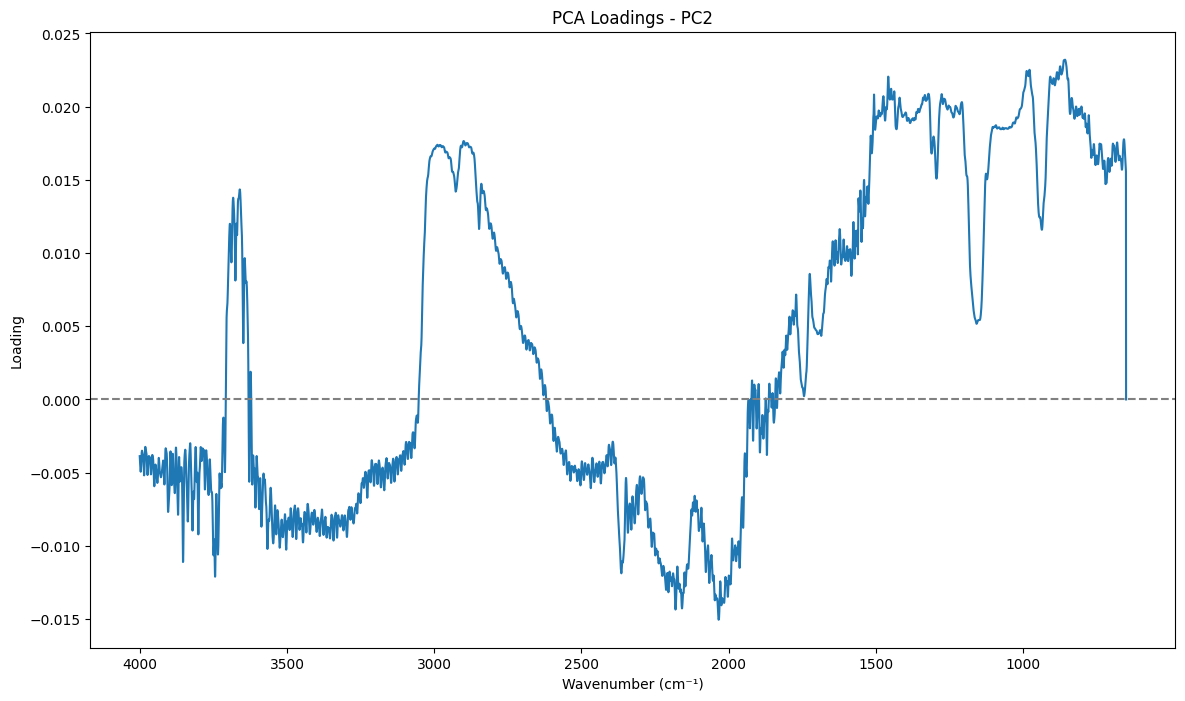

In [44]:
# Plot PCA loadings for PC2
plot_pca_loadings(pca_2.components_[1], 'PCA Loadings - PC2')

In [45]:
# Create a loading DataFrame and print the top 10 most influential wavenumbers for PC1 and PC2
loading_df = pd.DataFrame({
    'Wavenumber': np.linspace(4000, 650, ftir_data.shape[1]),  # Adjust to match the actual wavenumber range
    'PC1': pca_2.components_[0],
    'PC2': pca_2.components_[1]
})

top_n = 10
top_pc1 = loading_df.reindex(loading_df['PC1'].abs().sort_values(ascending=False).index).head(top_n)
top_pc2 = loading_df.reindex(loading_df['PC2'].abs().sort_values(ascending=False).index).head(top_n)

print("Top 10 Most Influential Wavenumbers for PC1:")
print(top_pc1[['Wavenumber', 'PC1']])

print("Top 10 Most Influential Wavenumbers for PC2:")
print(top_pc2[['Wavenumber', 'PC2']])

Top 10 Most Influential Wavenumbers for PC1:
       Wavenumber       PC1
1684  3188.287770  0.015963
1685  3187.805755  0.015960
1683  3188.769784  0.015955
1666  3196.964029  0.015955
1667  3196.482014  0.015952
1665  3197.446043  0.015950
1686  3187.323741  0.015948
1635  3211.906475  0.015941
1664  3197.928058  0.015940
1668  3196.000000  0.015940
Top 10 Most Influential Wavenumbers for PC2:
      Wavenumber       PC2
6520  857.266187  0.023206
6519  857.748201  0.023206
6518  858.230216  0.023201
6521  856.784173  0.023198
6517  858.712230  0.023195
6516  859.194245  0.023189
6515  859.676259  0.023185
6514  860.158273  0.023182
6513  860.640288  0.023180
6522  856.302158  0.023178


mbuh

In [46]:
# Filter the data to remove specific provinces
validation_provinces = ['PLG', 'SKM', 'SSX', 'KTX', 'JHR']
training_data = data[~data['prov_char'].isin(validation_provinces)]

In [52]:
# Province counts on 'data'
print("\nProvince Counts:\n", training_data['prov_char'].value_counts())


Province Counts:
 prov_char
SNI    75
CPN    42
TRG    39
KBI    37
NWT    24
SNK    24
NRT    24
BBX    18
KBX    18
SUX    18
PKN    18
RNG    16
STN    15
CCO    13
CBI    12
RIX    11
SGR    11
PTN     7
KRI     6
PNA     3
Name: count, dtype: int64


In [69]:
import pandas as pd
import numpy as np

# Create a mapping for country codes to country names
country_mapping = {
    0: 'Thailand',
    1: 'Indonesia',
    2: 'Malaysia'
}

# Map the country codes to country names
data['country_name'] = data['country_code'].map(country_mapping)

# Filter the data to remove specific provinces
validation_provinces = ['PLG', 'SKM', 'SSX', 'KTX', 'JHR']
training_data = data[~data['prov_char'].isin(validation_provinces)]

# Extract FTIR Spectrum Data
ftir_data = training_data.iloc[:, 4:-1]  # Exclude metadata columns and last column with NaN values

# Remove specified spectral regions
filtered_columns = [col for col in ftir_data.columns if not (3100 <= float(col) <= 4000 or 1870 <= float(col) <= 2700)]
filtered_ftir_data = ftir_data[filtered_columns]

# Create a new DataFrame with the filtered data
filtered_ftir_df = pd.DataFrame(filtered_ftir_data)

# Remove any remaining NaN values
filtered_ftir_df = filtered_ftir_df.dropna(axis=1, how='any')

# Display the head of the new DataFrame and its shape
filtered_ftir_df.head(), filtered_ftir_df.shape


(   4000.122  3099.528  3099.046  3098.564  3098.082    3097.6  3097.118  \
 0  0.000788  0.002471  0.002400  0.002327  0.002251  0.002176  0.002106   
 1  0.001095  0.002932  0.002932  0.002909  0.002861  0.002796  0.002721   
 2  0.000099  0.001651  0.001675  0.001680  0.001666  0.001634  0.001589   
 3  0.001685  0.003385  0.003437  0.003485  0.003524  0.003555  0.003571   
 4  0.002118  0.002765  0.002775  0.002776  0.002755  0.002706  0.002632   
 
    3096.636  3096.154  3095.671  ...   654.232    653.75   653.268   652.786  \
 0  0.002054  0.002030  0.002042  ...  0.010798  0.011951  0.013370  0.014849   
 1  0.002646  0.002579  0.002526  ...  0.012223  0.012086  0.011914  0.011799   
 2  0.001537  0.001487  0.001451  ...  0.010014  0.010487  0.011307  0.012372   
 3  0.003569  0.003543  0.003488  ...  0.008214  0.008177  0.008240  0.008484   
 4  0.002539  0.002439  0.002352  ...  0.009767  0.009831  0.010143  0.010621   
 
     652.304   651.822    651.34   650.858   650.376  